In [ ]:
# SE REALIZA PREDICCIÓN DE REGRESIÓN LINEAL SIMPLE PARA CALCULAR GENERACIÓN DE RESIDUOS HASTA EL AÑO 2035 DE CATALUÑA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Librería de visualización de datos en 2D y Pyplot es una interfaz para crear gráficos.
import seaborn as sns # Librería de visualización de datos basada en matplotlib.
from pandas.plotting import scatter_matrix # Crear una matriz de dispersión que muestra gráficos de dispersión 
from sklearn.linear_model import LinearRegression # Librería de aprendizaje automático (machine learning).


In [2]:
# DATAFRAME PARA EL DATASET DE LOS DATOS LIMPIOS DE CAT. 
df = pd.read_csv('Dataset_CAT_Limpio.csv')

In [3]:
df.head(1)

,Any,Població Catalunya,Total Recollida Selectiva,Total Fracció Resta,Generació Residus CAT Totals,RS / RC % Total,FR / RC % Total
0,2000,6090040,485070,2990154,3475225,13.96,86.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Any                           22 non-null     int64  
 1   Població Catalunya            22 non-null     int64  
 2   Total Recollida Selectiva     22 non-null     int64  
 3   Total Fracció Resta           22 non-null     int64  
 4   Generació Residus CAT Totals  22 non-null     int64  
 5   RS / RC % Total               22 non-null     float64
 6   FR / RC % Total               22 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 1.3 KB


array([[<AxesSubplot:xlabel='Any', ylabel='Any'>,
        <AxesSubplot:xlabel='Població Catalunya', ylabel='Any'>,
        <AxesSubplot:xlabel='Total Recollida Selectiva', ylabel='Any'>,
        <AxesSubplot:xlabel='Total Fracció Resta', ylabel='Any'>,
        <AxesSubplot:xlabel='Generació Residus CAT Totals', ylabel='Any'>,
        <AxesSubplot:xlabel='RS / RC % Total', ylabel='Any'>,
        <AxesSubplot:xlabel='FR / RC % Total', ylabel='Any'>],
       [<AxesSubplot:xlabel='Any', ylabel='Població Catalunya'>,
        <AxesSubplot:xlabel='Població Catalunya', ylabel='Població Catalunya'>,
        <AxesSubplot:xlabel='Total Recollida Selectiva', ylabel='Població Catalunya'>,
        <AxesSubplot:xlabel='Total Fracció Resta', ylabel='Població Catalunya'>,
        <AxesSubplot:xlabel='Generació Residus CAT Totals', ylabel='Població Catalunya'>,
        <AxesSubplot:xlabel='RS / RC % Total', ylabel='Població Catalunya'>,
        <AxesSubplot:xlabel='FR / RC % Total', ylabel='Població Cat

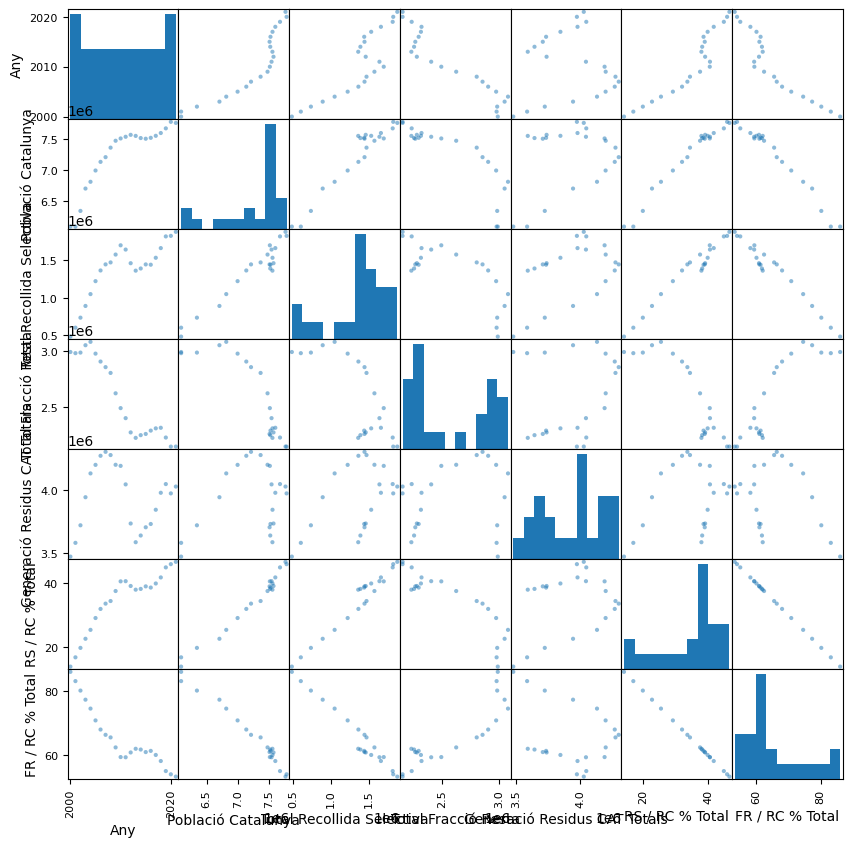

In [5]:
# MATRIZ SCATTERPLOTS CRUZADOS DE LAS VARIABLES CON HISTROGRAMA.
# Matriz simétrica. 
scatter_matrix(df, figsize = (10,10))

<AxesSubplot:>

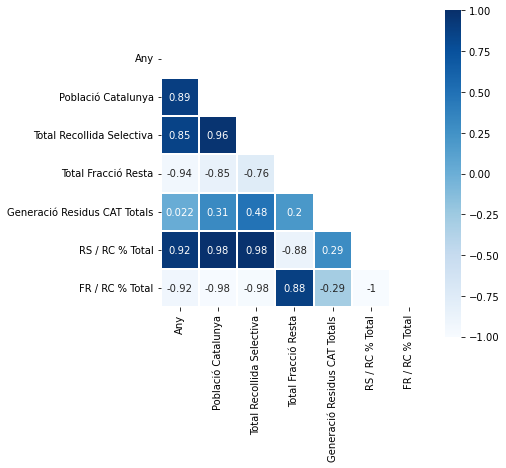

In [5]:
# MATRIZ CORRELACIÓN CON MAPA DE CALOR.
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=.1, annot= True)

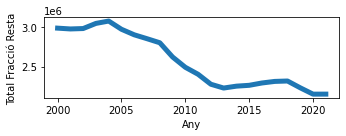

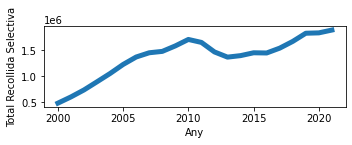

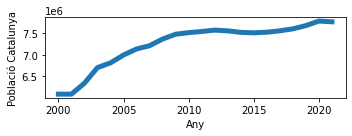

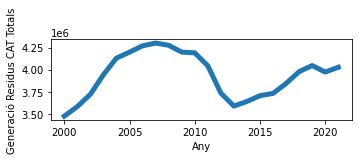

In [7]:
# ANALIZAMOS LOS DATOS EN GRÁFICA LINEAL POR AÑOS.
list_to_plot = ['Total Fracció Resta','Total Recollida Selectiva','Població Catalunya','Generació Residus CAT Totals']
for i in list_to_plot:
    fig, ax = plt.subplots(figsize=(5,2))
    sns.lineplot(data = df, y=i, x = 'Any', linewidth =5)
    plt.tight_layout()
    plt.show()

In [10]:
# CORRELACIÓN DE PEARSON es una medida común de la correlación lineal. Varía entre -1 y
# +1, donde -1 indica una correlación negativa perfecta, +1 indica una correlación positiva perfecta, y 0.
correlation_matrix = df.corr()
print(correlation_matrix)

                                   Any  Població Catalunya  \
Any                           1.000000            0.887875   
Població Catalunya            0.887875            1.000000   
Total Recollida Selectiva     0.854901            0.961809   
Total Fracció Resta          -0.937072           -0.845023   
Generació Residus CAT Totals  0.022166            0.310080   
RS / RC % Total               0.924613            0.984940   
FR / RC % Total              -0.924613           -0.984940   

                              Total Recollida Selectiva  Total Fracció Resta  \
Any                                            0.854901            -0.937072   
Població Catalunya                             0.961809            -0.845023   
Total Recollida Selectiva                      1.000000            -0.764523   
Total Fracció Resta                           -0.764523             1.000000   
Generació Residus CAT Totals                   0.477825             0.200941   
RS / RC % Total        

In [11]:
df2 = df[['Any','Total Fracció Resta','Total Recollida Selectiva','Població Catalunya']]
correlation_matrix = df2.corr()
print(correlation_matrix)

                                Any  Total Fracció Resta  \
Any                        1.000000            -0.937072   
Total Fracció Resta       -0.937072             1.000000   
Total Recollida Selectiva  0.854901            -0.764523   
Població Catalunya         0.887875            -0.845023   

                           Total Recollida Selectiva  Població Catalunya  
Any                                         0.854901            0.887875  
Total Fracció Resta                        -0.764523           -0.845023  
Total Recollida Selectiva                   1.000000            0.961809  
Població Catalunya                          0.961809            1.000000  


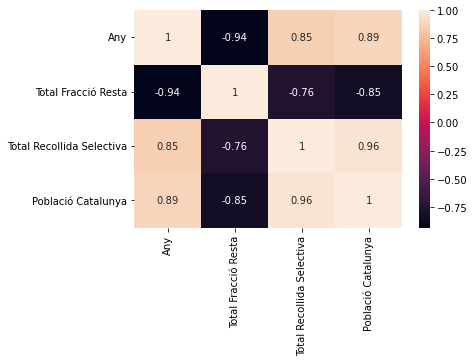

In [12]:
# MAPA DE CALOR SIMPLIFICADO. 
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [13]:
# CREACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE PARA LOS AÑOS DEL 2022-2035, PARTIENDO DE LOS DATOS DEL 2000-2021 OFICIALES. 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos históricos del DataFrame existente
years = df['Any'].tolist()
poblacion = df['Població Catalunya'].tolist()
total_generado = df['Generació Residus CAT Totals'].tolist()
total_recogida_selectiva = df['Total Recollida Selectiva'].tolist()
total_resto = df['Total Fracció Resta'].tolist()

# Convertir los datos a matrices numpy
X = np.array(years).reshape(-1, 1)
y_poblacion = np.array(poblacion)
y_total_generado = np.array(total_generado)
y_total_recogida_selectiva = np.array(total_recogida_selectiva)
y_total_resto = np.array(total_resto)

# Crear el modelo de regresión lineal para cada una de las variables
reg_poblacion = LinearRegression()
reg_total_generado = LinearRegression()
reg_total_recogida_selectiva = LinearRegression()
reg_total_resto = LinearRegression()

# Entrenar el modelo para cada variable
reg_poblacion.fit(X, y_poblacion)
reg_total_generado.fit(X, y_total_generado)
reg_total_recogida_selectiva.fit(X, y_total_recogida_selectiva)
reg_total_resto.fit(X, y_total_resto)

# Predicción para los años futuros (2022 - 2035)
future_years = range(2022, 2036)
predicted_poblacion = reg_poblacion.predict(np.array(future_years).reshape(-1, 1))
predicted_total_generado = reg_total_generado.predict(np.array(future_years).reshape(-1, 1))
predicted_total_recogida_selectiva = reg_total_recogida_selectiva.predict(np.array(future_years).reshape(-1, 1))
predicted_total_resto = reg_total_resto.predict(np.array(future_years).reshape(-1, 1))

# Crear un DataFrame con los datos históricos y las predicciones
Data_Prediccion_CAT = {
    'Any': years + list(future_years),
    'Població Catalunya': poblacion + list(map(int, predicted_poblacion)),
    'Generació Residus CAT Totals': total_generado + list(map(int, predicted_total_generado)),
    'Total Recollida Selectiva': total_recogida_selectiva + list(map(int, predicted_total_recogida_selectiva)),
    'Total Fracció Resta': total_resto + list(map(int, predicted_total_resto))
}
df_prediccion = pd.DataFrame(Data_Prediccion_CAT)

# Mostrar el nuevo dataset
df_prediccion.tail(5)

,Any,Població Catalunya,Generació Residus CAT Totals,Total Recollida Selectiva,Total Fracció Resta
31,2031,8695337,3954373,2410040,1544332
32,2032,8766239,3955244,2461088,1494155
33,2033,8837140,3956115,2512135,1443978
34,2034,8908042,3956986,2563183,1393802
35,2035,8978943,3957856,2614231,1343625


In [15]:
# SE AGREGAN 2 NUEVAS COLUMNAS Y SE CAMBIAN LOS NOMBRES DE LAS COLUMNAS.
df_prediccion = df_prediccion.assign(RS_RC_porcentaje_total=(df_prediccion['Total Recollida Selectiva'] /df_prediccion['Generació Residus CAT Totals']) * 100).round(2)
df_prediccion = df_prediccion.assign(FR_RC_porcentaje_total=(df_prediccion['Total Fracció Resta'] / df_prediccion['Generació Residus CAT Totals']) * 100).round(2)
df_prediccion.rename(columns={'RS_RC_porcentaje_total':'RS / RC % Total','FR_RC_porcentaje_total':'FR / RC % Total'}, inplace=True)

In [16]:
df_prediccion.head(1)

,Any,Població Catalunya,Generació Residus CAT Totals,Total Recollida Selectiva,Total Fracció Resta,RS / RC % Total,FR / RC % Total
0,2000,6090040,3475225,485070,2990154,13.96,86.04


In [17]:
# GUARDAR DATAFRAME CON LAS PREDICCIONES.
df_prediccion.to_csv('Data_Prediccion_CAT.csv', index=False)

In [18]:
# CALCULAR EL ERROR CUADRÁTICO MEDIO Y EL COEFICIENTE DE DETERMINACIÓN R PARA EVALUAR LOS MODELOS. 
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
# Predecir resultados para cada variable
y_pred_poblacion = reg_poblacion.predict(X)
y_pred_generado = reg_total_generado.predict(X)
y_pred_recogida_selectiva = reg_total_recogida_selectiva.predict(X)
y_pred_resto = reg_total_resto.predict(X)

# Estadístico R2/Variance Score
r2_poblacion = r2_score(y_poblacion, y_pred_poblacion)
r2_generado = r2_score(y_total_generado, y_pred_generado)
r2_recogida_selectiva = r2_score(y_total_recogida_selectiva, y_pred_recogida_selectiva)
r2_resto = r2_score(y_total_resto, y_pred_resto)

# Error cuadrático medio
mse_poblacion = mean_squared_error(y_poblacion, y_pred_poblacion)
mse_generado = mean_squared_error(y_total_generado, y_pred_generado)
mse_recogida_selectiva = mean_squared_error(y_total_recogida_selectiva, y_pred_recogida_selectiva)
mse_resto = mean_squared_error(y_total_resto, y_pred_resto)

# Coeficientes
coeficientes_poblacion = reg_poblacion.coef_
coeficientes_generado = reg_total_generado.coef_
coeficientes_recogida_selectiva = reg_total_recogida_selectiva.coef_
coeficientes_resto = reg_total_resto.coef_

# Término independiente
intercepto_poblacion = reg_poblacion.intercept_
intercepto_generado = reg_total_generado.intercept_
intercepto_recogida_selectiva = reg_total_recogida_selectiva.intercept_
intercepto_resto = reg_total_resto.intercept_

# Mostrar los resultados


print("Variance score/Estadística R2 se refiere al coeficiente de determinación (R^2), que indica la proporción de la varianza en la variable dependiente que puede ser explicada por el modelo de regresión. Este valor oscila entre 0 y 1, donde 1 indica un ajuste perfecto.")
print("Variance score Población: %.2f" % r2_poblacion)
print("Variance score Total Generado: %.2f" % r2_generado)
print("Variance score Recogida Selectiva: %.2f" % r2_recogida_selectiva)
print("Variance score Resto: %.2f" % r2_resto)
print()

print("Error cuadrático medio se refiere al error cuadrático medio (MSE) del modelo de regresión. El MSE representa la diferencia promedio entre los valores observados y los valores predichos por el modelo. En este caso, el valor del MSE es 'x', lo que indica que, en promedio, el modelo tiene un error cuadrático medio de 'x'")
print("Error cuadrático medio Población:", mse_poblacion)
print("Error cuadrático medio Total Generado:", mse_generado)
print("Error cuadrático medio Recogida Selectiva:", mse_recogida_selectiva)
print("Error cuadrático medio Resto:", mse_resto)
print()

print("Coeficiente de la regresión lineal. En este caso, hay un solo coeficiente que tiene un valor 'x'. Esto significa que, en el modelo de regresión lineal, por cada unidad de cambio en la variable independiente, se espera un aumento de aproximadamente 'x' en la variable dependiente.")
print("Coeficientes Población:", coeficientes_poblacion)
print("Coeficientes Total Generado:", coeficientes_generado)
print("Coeficientes Recogida Selectiva:", coeficientes_recogida_selectiva)
print("Coeficientes Resto:", coeficientes_resto)
print()

print("Término independiente es el término independiente o constante en la regresión lineal. En este caso, el valor es 'x'. Esta constante indica el valor esperado de la variable dependiente cuando todas las variables independientes son cero.")
print("Término independiente Población:", intercepto_poblacion)
print("Término independiente Total Generado:", intercepto_generado)
print("Término independiente Recogida Selectiva:", intercepto_recogida_selectiva)
print("Término independiente Resto:", intercepto_resto)





Variance score/Estadística R2 se refiere al coeficiente de determinación (R^2), que indica la proporción de la varianza en la variable dependiente que puede ser explicada por el modelo de regresión. Este valor oscila entre 0 y 1, donde 1 indica un ajuste perfecto.
Variance score Población: 0.79
Variance score Total Generado: 0.00
Variance score Recogida Selectiva: 0.73
Variance score Resto: 0.88

Error cuadrático medio se refiere al error cuadrático medio (MSE) del modelo de regresión. El MSE representa la diferencia promedio entre los valores observados y los valores predichos por el modelo. En este caso, el valor del MSE es 'x', lo que indica que, en promedio, el modelo tiene un error cuadrático medio de 'x'
Error cuadrático medio Población: 54330996224.07187
Error cuadrático medio Total Generado: 62107921519.05887
Error cuadrático medio Recogida Selectiva: 38625252185.1161
Error cuadrático medio Resto: 14067316647.576805

Coeficiente de la regresión lineal. En este caso, hay un solo

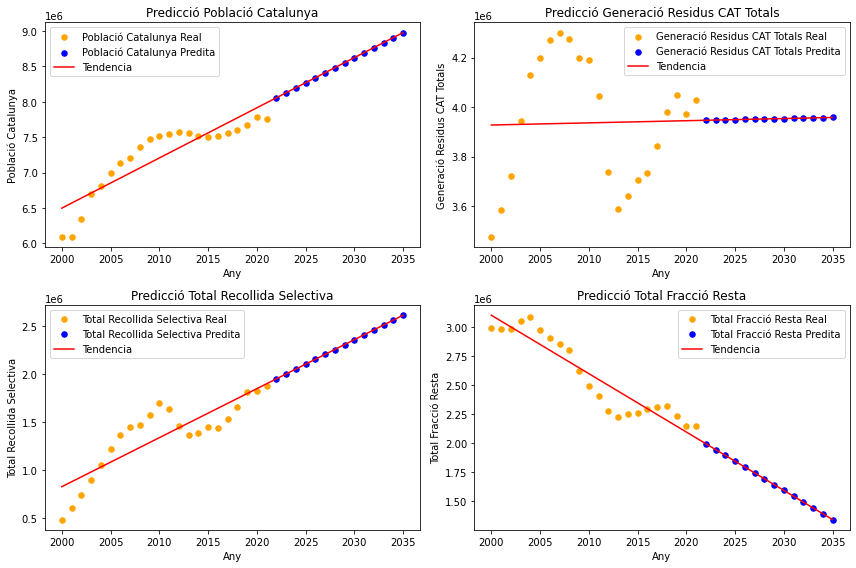

In [20]:
# GRÁFICAS PARA MOSTRAR LOS DATOS REALES CON LOS DATOS PREDICHOS Y SU LINEA DE TENDENCIA. 
import matplotlib.pyplot as plt
import numpy as np

# Colores y tamaño
colores = ['orange', 'blue']
tamanios = [30, 60]

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

variables = [
    ('Població Catalunya', poblacion, predicted_poblacion),
    ('Generació Residus CAT Totals', total_generado, predicted_total_generado),
    ('Total Recollida Selectiva', total_recogida_selectiva, predicted_total_recogida_selectiva),
    ('Total Fracció Resta', total_resto, predicted_total_resto)
]

for i, (variable, real, predicted) in enumerate(variables):
    ax = axs[i // 2, i % 2]
    ax.scatter(years, real, c=colores[0], s=tamanios[0], label=f'{variable} Real')
    ax.scatter(future_years, predicted, c=colores[1], s=tamanios[0], label=f'{variable} Predita')

    # Ajuste de regresión lineal
    data = list(zip(years, real)) + list(zip(future_years, predicted))
    data.sort()  # Ordenar por años
    x, y = zip(*data)  # Desempaquetar los pares (x, y)

    coefs = np.polyfit(x, y, 1)
    line = np.poly1d(coefs)
    x_line = np.linspace(min(x), max(future_years), 100)
    y_line = line(x_line)

    # Línea de tendencia
    ax.plot(x_line, y_line, c='red', label='Tendencia')

    # Personalizar el gráfico
    ax.set_xlabel('Any')
    ax.set_ylabel(variable)
    ax.set_title(f'Predicció {variable}')
    ax.legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()
